In [140]:
##load required libraries
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
#import brewer2mpl

# For .read_csv, always use header=0 when you know row 0 is the header row
df = pd.read_csv('data/train.csv', header=0)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)

In [165]:
def remove_border(axes=None, top=False, right=False, left=False, bottom=False):
    """
    Minimize chartjunk by stripping out unnecesasry plot borders and axis ticks
    
    The top/right/left/bottom keywords toggle whether the corresponding plot border is drawn
    """
    ax = axes or plt.gca()
    ax.spines['top'].set_visible(top)
    ax.spines['right'].set_visible(right)
    ax.spines['left'].set_visible(left)
    ax.spines['bottom'].set_visible(bottom)
    
    #turn off all ticks
    ax.yaxis.set_ticks_position('none')
    ax.xaxis.set_ticks_position('none')
    
    #now re-enable visibles
    if top:
        ax.xaxis.tick_top()
    if bottom:
        ax.xaxis.tick_bottom()
    if left:
        ax.yaxis.tick_left()
    if right:
        ax.yaxis.tick_right()

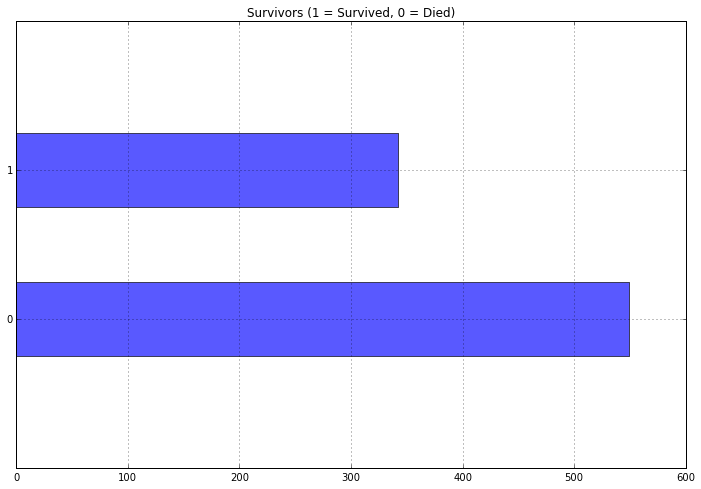

In [252]:
#
plt.figure(figsize=(12,8))
ax = df.Survived.value_counts().plot(kind='barh', color="blue", alpha=.65)
ax.set_ylim(-1, len(df.Survived.value_counts())) 
plt.title("Survivors (1 = Survived, 0 = Died)")

In [246]:
#plt.figure(figsize=(12,8))
#df.Survived[df.Sex == 'male'].value_counts().plot(kind='barh',label='Male')
#df.Survived[df.Sex == 'female'].value_counts().plot(kind='barh', color='#FA2379',label='Female')
#ax1.set_ylim(-1, 2) 
#plt.title("Survivors per Gender")
#plt.legend(loc='best')
#remove_border(bottom=True, left=True)

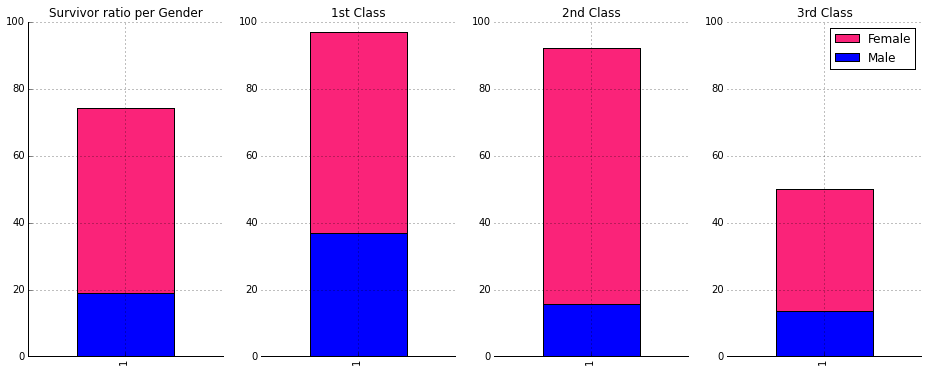

In [169]:
plt.figure(figsize=(16,6))

ax1 = plt.subplot2grid((1,4),(0,0))
(100 * df.Survived[df.Survived == 1][df.Sex == 'female'].value_counts()/float(df.Sex[df.Sex == 'female'].size)).plot(kind='bar', color='#FA2379',label='Female')
(100 * df.Survived[df.Survived == 1][df.Sex == 'male'].value_counts()/float(df.Sex[df.Sex == 'male'].size)).plot(kind='bar',label='Male')
ax1.set_ylim(0, 100)
remove_border(left=True)
# puts a title on our graph
plt.title("Survivor ratio per Gender")

ax2 = plt.subplot2grid((1,4),(0,1))
(100 * df.Survived[df.Survived == 1][df.Pclass == 1][df.Sex == 'female'].value_counts()/float(df.Sex[df.Pclass == 1][df.Sex == 'female'].size)).plot(kind='bar', color='#FA2379',label='Female')
(100 * df.Survived[df.Survived == 1][df.Pclass == 1][df.Sex == 'male'].value_counts()/float(df.Sex[df.Pclass == 1][df.Sex == 'male'].size)).plot(kind='bar',label='Male')
ax2.set_ylim(0, 100)
# puts a title on our graph
plt.title("1st Class")
remove_border(bottom=True)

ax3 = plt.subplot2grid((1,4),(0,2))
(100 * df.Survived[df.Survived == 1][df.Pclass == 2][df.Sex == 'female'].value_counts()/float(df.Sex[df.Pclass == 2][df.Sex == 'female'].size)).plot(kind='bar', color='#FA2379',label='Female')
(100 * df.Survived[df.Survived == 1][df.Pclass == 2][df.Sex == 'male'].value_counts()/float(df.Sex[df.Pclass == 2][df.Sex == 'male'].size)).plot(kind='bar',label='Male')
ax3.set_ylim(0, 100)
# puts a title on our graph
plt.title("2nd Class")
remove_border(bottom=True)

ax4 = plt.subplot2grid((1,4),(0,3))
(100 * df.Survived[(df.Survived == 1) & (df.Pclass == 3) & (df.Sex == 'female')].value_counts()/float(df.Sex[df.Pclass == 3][df.Sex == 'female'].size)).plot(kind='bar', color='#FA2379',label='Female')
(100 * df.Survived[df.Survived == 1][df.Pclass == 3][df.Sex == 'male'].value_counts()/float(df.Sex[df.Pclass == 3][df.Sex == 'male'].size)).plot(kind='bar',label='Male')
ax4.set_ylim(0, 100)
# puts a title on our graph
plt.title("3rd Class")
remove_border(bottom=True)
plt.legend(loc='best')

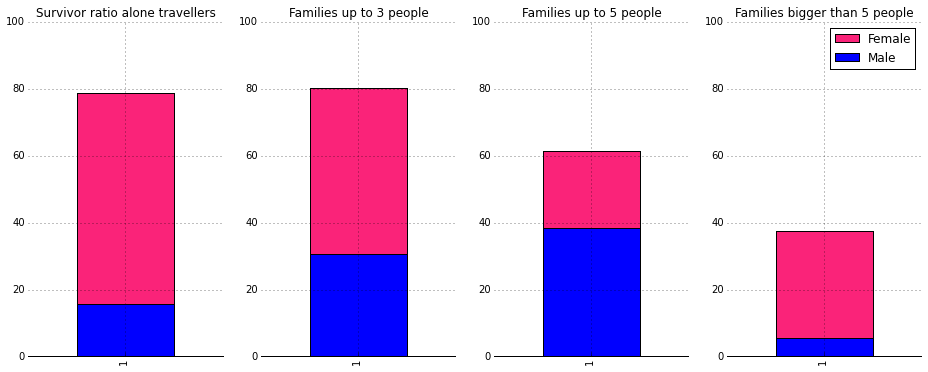

In [170]:
df['FamilySize'] = df['SibSp'] + df['Parch'] + 1

def familyBins(data, bin_size=2, max_size = 6):
    """Bin the ticket fare and add a new column BinFare"""
    data['familyBin'] = (((data.FamilySize.dropna())// bin_size).clip_upper(max_size).astype(np.int)) 

familyBins(df)


plt.figure(figsize=(16,6))
ax1 = plt.subplot2grid((1,4),(0,0))
(100 * df.Survived[df.Survived == 1][df.familyBin == 0][df.Sex == 'female'].value_counts()/float(df.Sex[df.familyBin == 0][df.Sex == 'female'].size)).plot(kind='bar', color='#FA2379',label='Female')
(100 * df.Survived[df.Survived == 1][df.familyBin == 0][df.Sex == 'male'].value_counts()/float(df.Sex[df.familyBin == 0][df.Sex == 'male'].size)).plot(kind='bar',label='Male')
# puts a title on our graph
ax1.set_ylim(0, 100)
remove_border(bottom=True)
plt.title("Survivor ratio alone travellers")

ax2 = plt.subplot2grid((1,4),(0,1))
(100 * df.Survived[df.Survived == 1][df.familyBin == 1][df.Sex == 'female'].value_counts()/float(df.Sex[df.familyBin == 1][df.Sex == 'female'].size)).plot(kind='bar', color='#FA2379',label='Female')
(100 * df.Survived[df.Survived == 1][df.familyBin == 1][df.Sex == 'male'].value_counts()/float(df.Sex[df.familyBin == 1][df.Sex == 'male'].size)).plot(kind='bar',label='Male')
# puts a title on our graph
ax2.set_ylim(0, 100)
remove_border(bottom=True)
plt.title("Families up to 3 people")

ax3 = plt.subplot2grid((1,4),(0,2))
(100 * df.Survived[df.Survived == 1][df.familyBin == 2][df.Sex == 'female'].value_counts()/float(df.Sex[df.familyBin == 2][df.Sex == 'female'].size)).plot(kind='bar', color='#FA2379',label='Female')
(100 * df.Survived[df.Survived == 1][df.familyBin == 2][df.Sex == 'male'].value_counts()/float(df.Sex[df.familyBin == 2][df.Sex == 'male'].size)).plot(kind='bar',label='Male')
ax3.set_ylim(0, 100)
remove_border(bottom=True)
# puts a title on our graph
plt.title("Families up to 5 people")

ax4 = plt.subplot2grid((1,4),(0,3))
(100 * df.Survived[df.Survived == 1][df.familyBin == 3][df.Sex == 'female'].value_counts()/float(df.Sex[df.familyBin == 3][df.Sex == 'female'].size)).plot(kind='bar', color='#FA2379',label='Female')
(100 * df.Survived[df.Survived == 1][df.familyBin == 3][df.Sex == 'male'].value_counts()/float(df.Sex[df.familyBin == 3][df.Sex == 'male'].size)).plot(kind='bar',label='Male')
# puts a title on our graph
ax4.set_ylim(0, 100)
remove_border(bottom=True)
plt.title("Families bigger than 5 people")

plt.legend(loc='best')



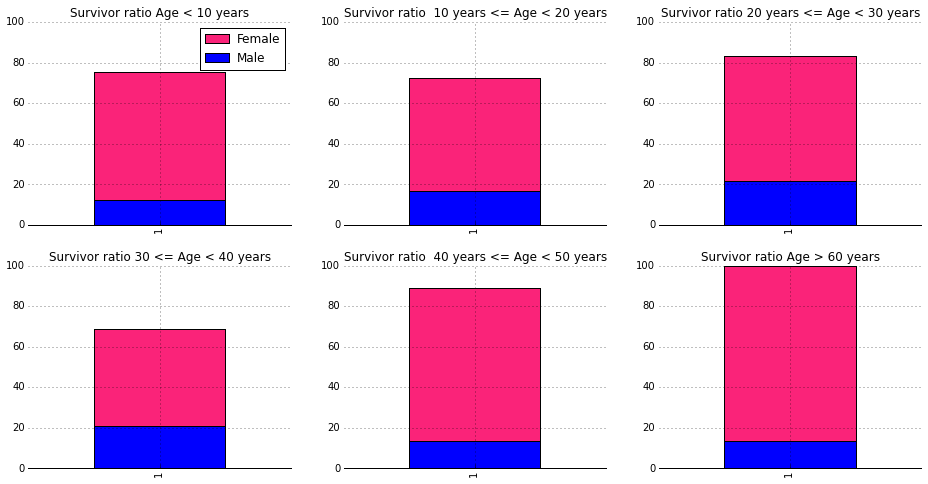

In [208]:
#split age in bins of 10 yea
def ageBins(data, bin_size=10, max_age = 6):
    """Bin the ticket fare and add a new column BinFare"""
    data['AgeBin'] = ((data.Age.dropna() // bin_size).clip_upper(max_age).astype(np.int)) * 10

ageBins(df)

plt.figure(figsize=(16,8))
ax1 = plt.subplot2grid((2,3),(0,0))
(100 * df.Survived[df.Survived == 1][df.AgeBin == 10][df.Sex == 'female'].value_counts()/float(df.Sex[df.AgeBin == 10][df.Sex == 'female'].size)).plot(kind='bar', color='#FA2379',label='Female')
(100 * df.Survived[df.Survived == 1][df.AgeBin == 10][df.Sex == 'male'].value_counts()/float(df.Sex[df.AgeBin == 10][df.Sex == 'male'].size)).plot(kind='bar',label='Male')
#ax1.set_xlim(-1, 2)
# puts a title on our graph
ax1.set_ylim(0, 100)
remove_border(bottom=True)
plt.legend(loc='best')
plt.title("Survivor ratio Age < 10 years")

ax2 = plt.subplot2grid((2,3),(0,1))
(100 * df.Survived[df.Survived == 1][df.AgeBin == 20][df.Sex == 'female'].value_counts()/float(df.Sex[df.AgeBin == 20][df.Sex == 'female'].size)).plot(kind='bar', color='#FA2379',label='Female')
(100 * df.Survived[df.Survived == 1][df.AgeBin == 20][df.Sex == 'male'].value_counts()/float(df.Sex[df.AgeBin == 20][df.Sex == 'male'].size)).plot(kind='bar',label='Male')
# puts a title on our graph
ax2.set_ylim(0, 100)
remove_border(bottom=True)
plt.title("Survivor ratio  10 years <= Age < 20 years")

ax3 = plt.subplot2grid((2,3),(0,2))
(100 * df.Survived[df.Survived == 1][df.AgeBin == 30][df.Sex == 'female'].value_counts()/float(df.Sex[df.AgeBin == 30][df.Sex == 'female'].size)).plot(kind='bar', color='#FA2379',label='Female')
(100 * df.Survived[df.Survived == 1][df.AgeBin == 30][df.Sex == 'male'].value_counts()/float(df.Sex[df.AgeBin == 30][df.Sex == 'male'].size)).plot(kind='bar',label='Male')
ax3.set_ylim(0, 100)
remove_border(bottom=True)
# puts a title on our graph
plt.title("Survivor ratio 20 years <= Age < 30 years")

ax4 = plt.subplot2grid((2,3),(1,0))
(100 * df.Survived[df.Survived == 1][df.AgeBin == 40][df.Sex == 'female'].value_counts()/float(df.Sex[df.AgeBin == 40][df.Sex == 'female'].size)).plot(kind='bar', color='#FA2379',label='Female')
(100 * df.Survived[df.Survived == 1][df.AgeBin == 40][df.Sex == 'male'].value_counts()/float(df.Sex[df.AgeBin == 40][df.Sex == 'male'].size)).plot(kind='bar',label='Male')
# puts a title on our graph
ax4.set_ylim(0, 100)
remove_border(bottom=True)
plt.title("Survivor ratio 30 <= Age < 40 years")

ax5 = plt.subplot2grid((2,3),(1,1))
(100 * df.Survived[df.Survived == 1][df.AgeBin == 50][df.Sex == 'female'].value_counts()/float(df.Sex[df.AgeBin == 50][df.Sex == 'female'].size)).plot(kind='bar', color='#FA2379',label='Female')
(100 * df.Survived[df.Survived == 1][df.AgeBin == 50][df.Sex == 'male'].value_counts()/float(df.Sex[df.AgeBin == 50][df.Sex == 'male'].size)).plot(kind='bar',label='Male')
# puts a title on our graph
ax5.set_ylim(0, 100)
remove_border(bottom=True)
plt.title("Survivor ratio  40 years <= Age < 50 years")

ax6 = plt.subplot2grid((2,3),(1,2))
(100 * df.Survived[df.Survived == 1][df.AgeBin == 60][df.Sex == 'female'].value_counts()/float(df.Sex[df.AgeBin == 60][df.Sex == 'female'].size)).plot(kind='bar', color='#FA2379',label='Female')
(100 * df.Survived[df.Survived == 1][df.AgeBin == 60][df.Sex == 'male'].value_counts()/float(df.Sex[df.AgeBin == 60][df.Sex == 'male'].size)).plot(kind='bar',label='Male')
ax6.set_ylim(0, 100)
remove_border(bottom=True)
# puts a title on our graph
plt.title("Survivor ratio Age > 60 years")

(0, 80)

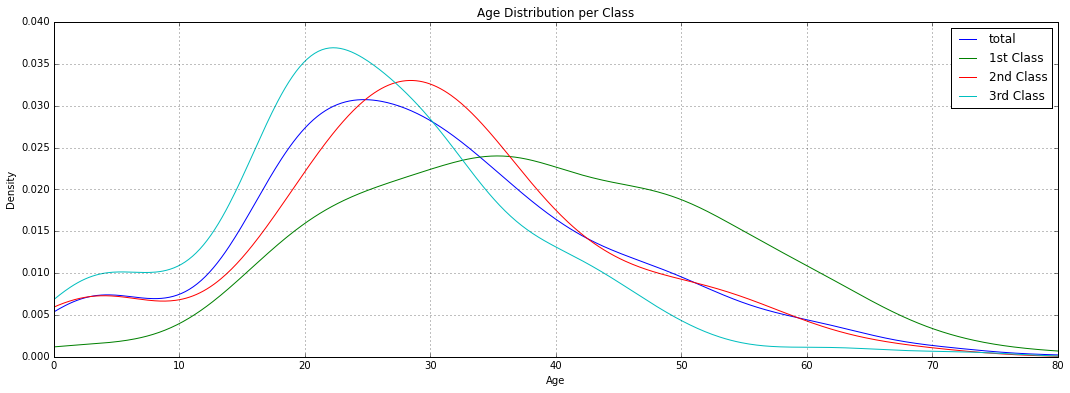

In [141]:
#colorbrewer2 Dark2 qualitative color table
#dark2_colors = brewer2mpl.get_map('Dark2', 'Qualitative', 7).mpl_colors

df = df[df.Fare.notnull()]
# parameters for graphs
fig = plt.figure(figsize=(18,6), dpi=1600) 
alpha=alpha_scatterplot = 0.2 
alpha_bar_chart = 0.55


# plots a kernel desnsity estimate of the subset of the 1st class passanges's age
dp = df.Age[df.Age.notnull()].plot(kind='kde')
df.Age[df.Age.notnull()][df.Pclass == 1].plot(kind='kde')    
df.Age[df.Age.notnull()][df.Pclass == 2].plot(kind='kde')
df.Age[df.Age.notnull()][df.Pclass == 3].plot(kind='kde')
 # plots an axis lable
plt.xlabel("Age")    
plt.title("Age Distribution per Class")
# sets our legend for our graph.
plt.legend(('total', '1st Class', '2nd Class','3rd Class'),loc='best')
dp.set_xlim(0, 80)

In [173]:
#how many passengrs travelling together with same ticket?
tickets = df['Ticket'].value_counts()
tickets = pd.DataFrame({'Ticket': tickets.index, 'Ticket_N': tickets.values})
#tickets.Ticket_N.hist(bins=8, range=(1,8), alpha = .5)
df = pd.merge(df, tickets, how='left')
df['Fare_N'] = df.Fare / df.Ticket_N
df.Fare_N.describe()

count    891.000000
mean      17.788989
std       21.218157
min        0.000000
25%        7.762500
50%        8.850000
75%       24.288200
max      221.779200
dtype: float64

(0, 100)

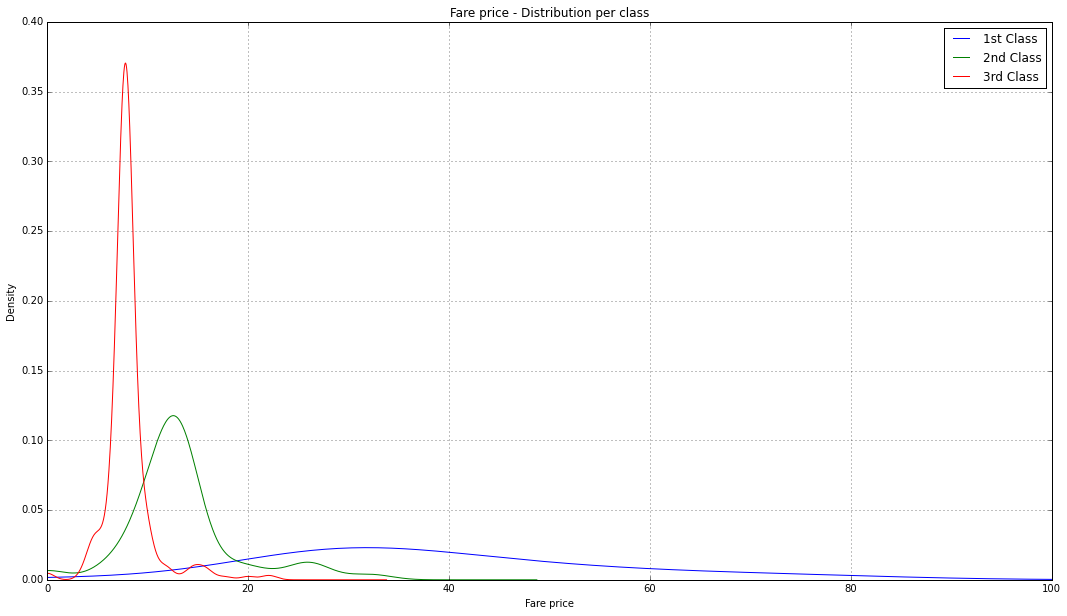

In [209]:
# parameters for graphs
fig = plt.figure(figsize=(18,10), dpi=1600) 
alpha=alpha_scatterplot = 0.2 
alpha_bar_chart = 0.55

# plots a kernel desnsity estimate of the subset of the 1st class passanges's age
dp = df.Fare_N[df.Pclass == 1].plot(kind='kde')   
df.Fare_N[df.Pclass == 2].plot(kind='kde')
df.Fare_N[df.Pclass == 3].plot(kind='kde')
 # plots an axis lable
plt.xlabel("Fare price")    
plt.title("Fare price - Distribution per class")
# sets our legend for our graph.
plt.legend(('1st Class', '2nd Class','3rd Class'),loc='best')
dp.set_xlim(0, 100)

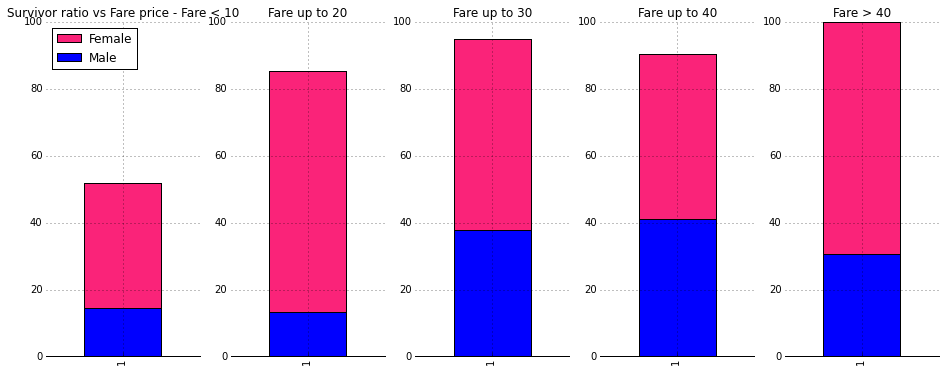

In [179]:
#split age in bins of 10 years
def fareBins(data, bin_size=10, max_fare = 4):
    """Bin the ticket fare and add a new column BinFare"""
    data['FareBin'] = ((data.Fare_N.dropna() // bin_size).clip_upper(max_fare).astype(np.int)) * 10

fareBins(df)

plt.figure(figsize=(16,6))
ax1 = plt.subplot2grid((1,5),(0,0))
(100 * df.Survived[df.Survived == 1][df.FareBin == 0][df.Sex == 'female'].value_counts()/float(df.Sex[df.FareBin == 0][df.Sex == 'female'].size)).plot(kind='bar', color='#FA2379',label='Female')
(100 * df.Survived[df.Survived == 1][df.FareBin == 0][df.Sex == 'male'].value_counts()/float(df.Sex[df.FareBin == 0][df.Sex == 'male'].size)).plot(kind='bar',label='Male')
# puts a title on our graph
ax1.set_ylim(0, 100)
remove_border(bottom=True)
plt.title("Survivor ratio vs Fare price - Fare < 10")
plt.legend(loc='upper left')

ax2 = plt.subplot2grid((1,5),(0,1))
(100 * df.Survived[df.Survived == 1][df.FareBin == 10][df.Sex == 'female'].value_counts()/float(df.Sex[df.FareBin == 10][df.Sex == 'female'].size)).plot(kind='bar', color='#FA2379',label='Female')
(100 * df.Survived[df.Survived == 1][df.FareBin == 10][df.Sex == 'male'].value_counts()/float(df.Sex[df.FareBin == 10][df.Sex == 'male'].size)).plot(kind='bar',label='Male')
# puts a title on our graph
ax2.set_ylim(0, 100)
remove_border(bottom=True)
plt.title("Fare up to 20")

ax3 = plt.subplot2grid((1,5),(0,2))
(100 * df.Survived[df.Survived == 1][df.FareBin == 20][df.Sex == 'female'].value_counts()/float(df.Sex[df.FareBin == 20][df.Sex == 'female'].size)).plot(kind='bar', color='#FA2379',label='Female')
(100 * df.Survived[df.Survived == 1][df.FareBin == 20][df.Sex == 'male'].value_counts()/float(df.Sex[df.FareBin == 20][df.Sex == 'male'].size)).plot(kind='bar',label='Male')
# puts a title on our graph
ax3.set_ylim(0, 100)
remove_border(bottom=True)
plt.title("Fare up to 30")

ax4 = plt.subplot2grid((1,5),(0,3))
(100 * df.Survived[df.Survived == 1][df.FareBin == 30][df.Sex == 'female'].value_counts()/float(df.Sex[df.FareBin == 30][df.Sex == 'female'].size)).plot(kind='bar', color='#FA2379',label='Female')
(100 * df.Survived[df.Survived == 1][df.FareBin == 30][df.Sex == 'male'].value_counts()/float(df.Sex[df.FareBin == 30][df.Sex == 'male'].size)).plot(kind='bar',label='Male')
# puts a title on our graph
ax4.set_ylim(0, 100)
remove_border(bottom=True)
plt.title("Fare up to 40")

ax5 = plt.subplot2grid((1,5),(0,4))
(100 * df.Survived[df.Survived == 1][df.FareBin == 40][df.Sex == 'female'].value_counts()/float(df.Sex[df.FareBin == 40][df.Sex == 'female'].size)).plot(kind='bar', color='#FA2379',label='Female')
(100 * df.Survived[df.Survived == 1][df.FareBin == 40][df.Sex == 'male'].value_counts()/float(df.Sex[df.FareBin == 40][df.Sex == 'male'].size)).plot(kind='bar',label='Male')
# puts a title on our graph
ax5.set_ylim(0, 100)
remove_border(bottom=True)
plt.title("Fare > 40")

In [204]:
#t = df.groupby(['Survived']).size()
#print t

#plt.subplot(aspect=True)
#plt.pie(t, labels=t.index.values)
#plt.title("Survivors on the Titanic")

In [203]:
agebins = df.groupby(['AgeBin', 'Survived']).size().unstack()
binsize = df.groupby('AgeBin').size()
len(agebins[0])
#fig = plt.figure(figsize=(18,8)) 
#plt.bar([0, 1, 2,3,4, 5,6], 100 * agebins[0] / binsize,  label='Died')
#plt.bar([0, 1, 2,3,4, 5,6], 100* agebins[1] / binsize,  color = '#FA2379', label='Survived')
#plt.xticks([0.5, 1.5, 2.5, 3.5, 4.5, 5.5, 6.5], [' < 10', ' up to 20', 'up to 30', 'up to 40', 'up to 50', 'up to 60', '> 60'], rotation='horizontal')
#remove_border(bottom=True, left = True)

7

In [206]:
#df.groupby(['AgeBin', 'Survived']).size().unstack()
#binsize = df.groupby('AgeBin').size()
#agebins[0] / binsize

(0, 75)

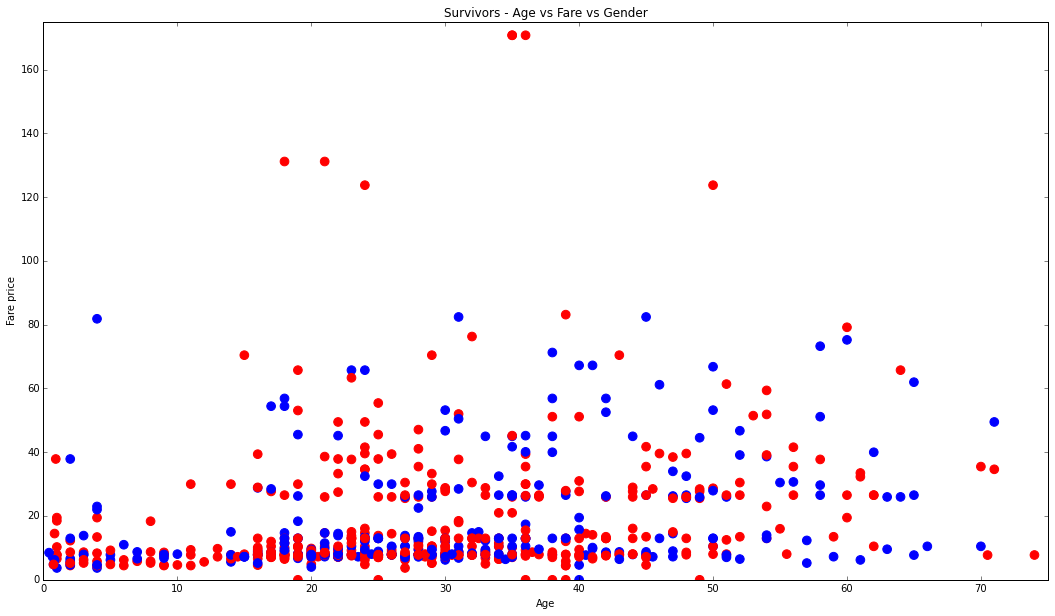

In [240]:
df['Gender'] = df['Sex'].map( {'female': 0, 'male': 1} ).astype(int)
fig = plt.figure(figsize=(18,10)) 
plt.title('Survivors - Age vs Fare vs Gender')
plt.xlabel('Age')
plt.ylabel('Fare price')
ax = plt.subplot(111)
color = df.Survived.map({1: "b", 0: "r"})
plt.scatter(df.Age, df.Fare_N, s=75, color=color)
ax.set_ylim(0, 175)
ax.set_xlim(0, 75)


(0, 75)

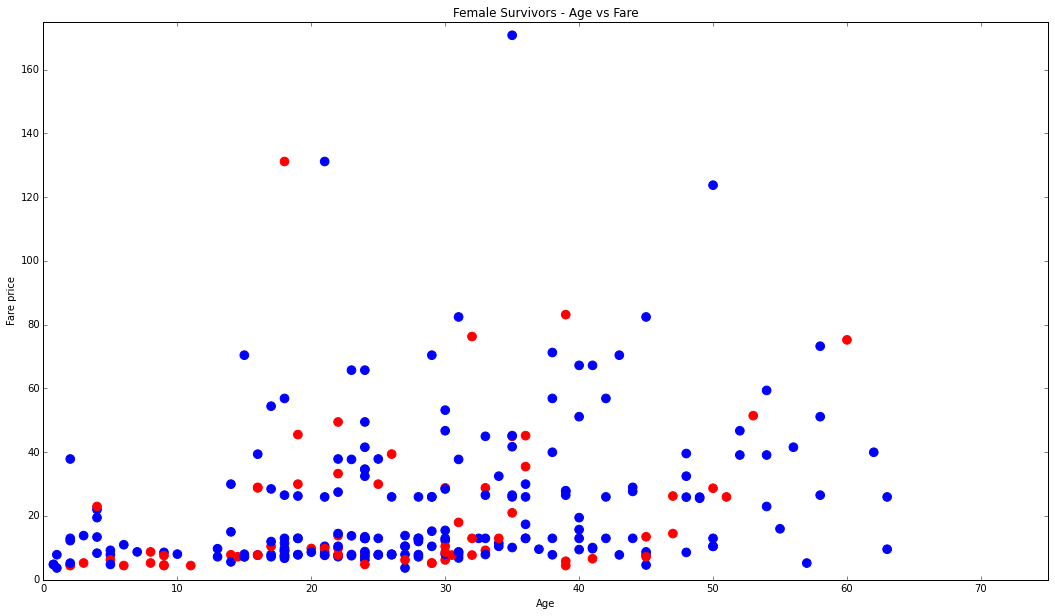

In [243]:
fig = plt.figure(figsize=(18,10)) 
plt.title('Female Survivors - Age vs Fare')
plt.xlabel('Age')
plt.ylabel('Fare price')
ax = plt.subplot(111)
color = df.Survived[df.Gender == 0].map({1: "b", 0: "r"})
plt.scatter(df.Age[df.Gender == 0], df.Fare_N[df.Gender == 0], s=75, color=color)
ax.set_ylim(0, 175)
ax.set_xlim(0, 75)

(0, 75)

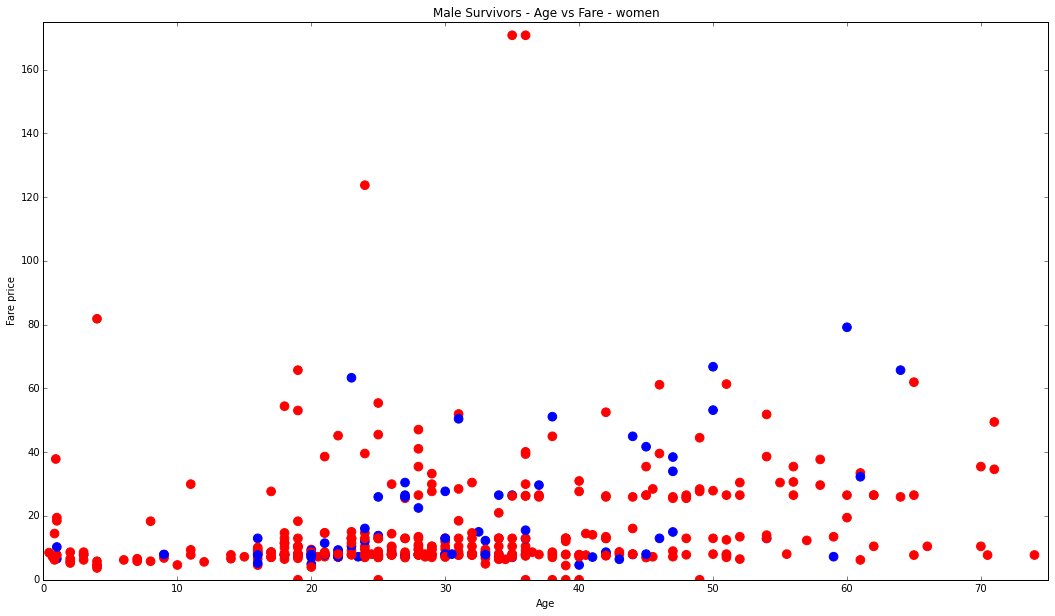

In [244]:
fig = plt.figure(figsize=(18,10)) 
plt.title('Male Survivors - Age vs Fare - women')
plt.xlabel('Age')
plt.ylabel('Fare price')
ax = plt.subplot(111)
color = df.Survived[df.Gender == 1].map({1: "b", 0: "r"})
plt.scatter(df.Age[df.Gender == 1], df.Fare_N[df.Gender == 1], s=75, color=color)
ax.set_ylim(0, 175)
ax.set_xlim(0, 75)